In [1]:
import numpy as np
import matplotlib.pyplot as plt
from epcsaftpy import component, pcsaft

In [2]:
cation = component('C2min', ms = 1.4872, sigma = 3.5926, eps = 206.49, z = 1., er = 1., Mw = 111.1675)
anion = component('BF4', ms = 3.8227, sigma = 3.5088, eps = 496.12, z = -1., er = 1., Mw = 86.805)


mix = cation + anion
x = np.array([0.5, 0.5])
eos = pcsaft(mix)

In [3]:
# Density calculation at 3 different temperatures (313.2 K, 392.9 K, 472.4 K)
# The pressure move from 1 bar to 2000 bar

T = np.array([313.2, 392.9, 472.4]) # K
nT = len(T)
n = 100
P = np.linspace(1, 2000, n) # bar
rho = np.zeros((nT, n))

for i in range(nT):
    for j in range(n):
        rho0 = eos.density(x, T[i], P[j]*1e5, 'L')
        rho[i, j] = rho0*1e-6*np.dot(x, eos.Mw) # g/cm3

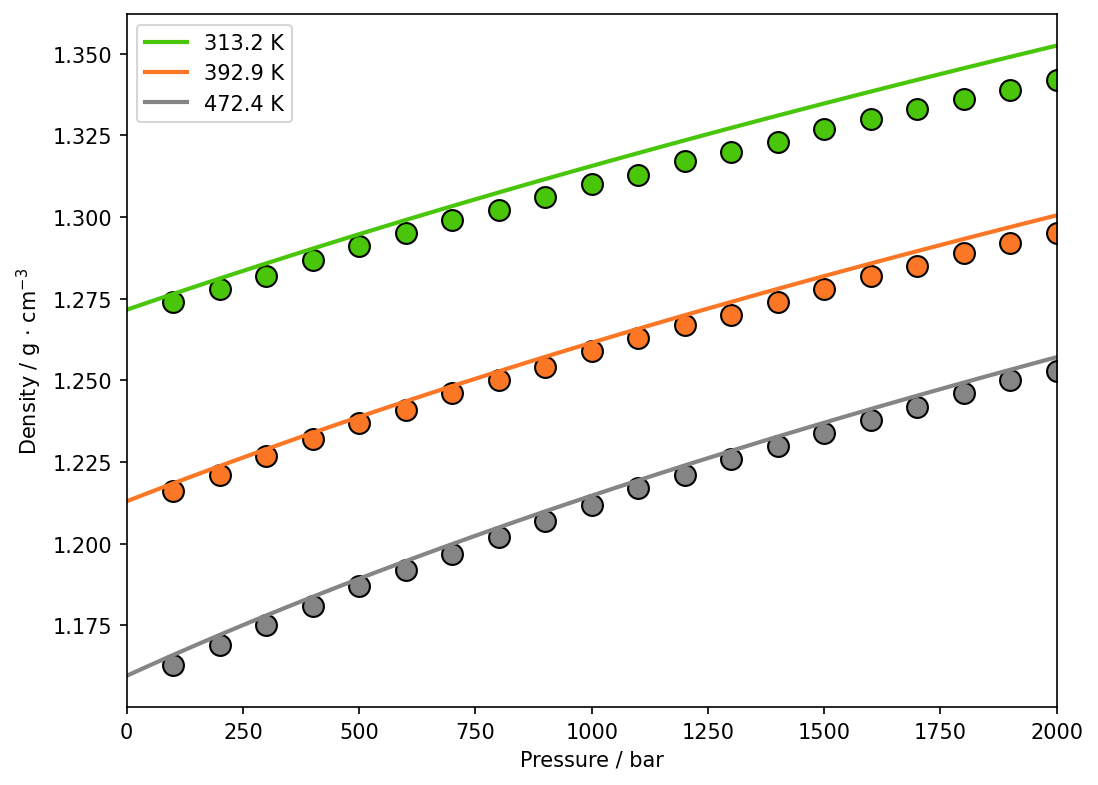

In [4]:
# Experimental data from: J. Chem. Eng. Data 2009, 54, 1, 22–27

Pexp = np.array([100, 200, 300, 400, 500, 600, 700, 800, 
                 900, 1000, 1100, 1200, 1300, 1400, 1500, 
                 1600, 1700, 1800, 1900, 2000])
rho1exp = np.array([1274, 1278, 1282, 1287, 1291, 1295, 1299, 1302, 
                   1306, 1310, 1313, 1317, 1320, 1323, 1327, 1330, 
                   1333, 1336, 1339, 1342])*1e-3 # g/cm3
rho2exp = np.array([1216, 1221, 1227, 1232, 1237, 1241, 1246, 1250,
                     1254, 1259, 1263, 1267, 1270, 1274, 1278, 1282,
                     1285, 1289, 1292, 1295])*1e-3 # g/cm3
rho3exp = np.array([1163, 1169, 1175, 1181, 1187, 1192, 1197, 1202,
                        1207, 1212, 1217, 1221, 1226, 1230, 1234, 1238,
                        1242, 1246, 1250, 1253])*1e-3 # g/cm3

fig, ax = plt.subplots(figsize = (8, 6), dpi = 150)
ax.plot(P, rho[0, :], label = '313.2 K', color = '#49C60A', linewidth = 2)
ax.plot(P, rho[1, :], label = '392.9 K', color = '#FC7725', linewidth = 2)
ax.plot(P, rho[2, :], label = '472.4 K', color = '#858585', linewidth = 2)
ax.scatter(Pexp, rho1exp, color = '#49C60A', marker = 'o', edgecolors='black', s=100)
ax.scatter(Pexp, rho2exp, color = '#FC7725', marker = 'o', edgecolors='black', s=100)
ax.scatter(Pexp, rho3exp, color = '#858585', marker = 'o', edgecolors='black', s=100)
ax.set_xlabel('Pressure / bar')
ax.set_ylabel(r'Density / g $\cdot$ cm$^{-3}$')
ax.set_xlim([0, 2000])
ax.legend()
plt.show()

In [5]:
# Export density data to txt file
np.savetxt('results/C2minBF4.txt', np.transpose([P, rho[0, :], rho[1, :], rho[2, :]]), 
           header = 'P/bar, rho_313.2K/gcm-3, rho_392.9K/gcm-3, rho_472.4K/gcm-3', 
           delimiter = '\t')